In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# File paths
item_spend_path = os.path.join(os.getcwd(), "item_spend.csv")
player_activity_path = os.path.join(os.getcwd(), "player_activity.csv")
player_statistics_path = os.path.join(os.getcwd(), "player_statistics.csv")

# Read the CSV files into DataFrames
item_spend_df = pd.read_csv(item_spend_path)
player_activity_df = pd.read_csv(player_activity_path)
player_statistics_df = pd.read_csv(player_statistics_path)

In [5]:
# Merge the DataFrames on 'account_id', 'platform_id', and 'occur_date'
merged_df = pd.merge(item_spend_df, player_activity_df, on=['account_id', 'platform_id', 'occur_date'])
df = pd.merge(merged_df, player_statistics_df, on=['account_id', 'platform_id', 'occur_date'])

# Display the merged DataFrame
df.head(10)

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent,activity_type,time_spent,kills,...,success,money_vs_time_spent,rp_vs_time_spent,ltd_days_played,first_day_played,evc_balance,pvc_balance,char_rank,daily_playtime,days_since_first
0,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Heist,4.036578,21,...,1,11466.675774,379.060596,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
1,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Race,0.996677,0,...,1,783.119435,296.873998,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
2,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Gunrunner,1.475342,0,...,0,37725.855410,337.549886,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
3,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Nightclub Owner,1.848230,0,...,0,90471.473552,269.447716,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
4,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Race,1.004437,0,...,1,231.230684,127.006107,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
5,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Freeroam - Business Battles,6.457997,0,...,0,20.272465,5.285451,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
6,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Heist,3.960725,21,...,1,66219.531380,423.630216,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
7,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421385,Executive,2.367032,0,...,1,4268.444174,210.390682,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
8,1295,PS4,2020-10-24,Rune Cheburek,CAR,SPORTS CLASSIC,57846.630658,Heist,4.036578,21,...,1,11466.675774,379.060596,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017
9,1295,PS4,2020-10-24,Rune Cheburek,CAR,SPORTS CLASSIC,57846.630658,Race,0.996677,0,...,1,783.119435,296.873998,308.0,2018-01-11,725717.530566,0.0,122.0,1.952899,1017


In [6]:
cols = list(df.columns)
cols

['account_id',
 'platform_id',
 'occur_date',
 'item',
 'item_type',
 'item_sub_type',
 'money_spent',
 'activity_type',
 'time_spent',
 'kills',
 'deaths',
 'suicides',
 'money_earned',
 'rp_earned',
 'success',
 'money_vs_time_spent',
 'rp_vs_time_spent',
 'ltd_days_played',
 'first_day_played',
 'evc_balance',
 'pvc_balance',
 'char_rank',
 'daily_playtime',
 'days_since_first']

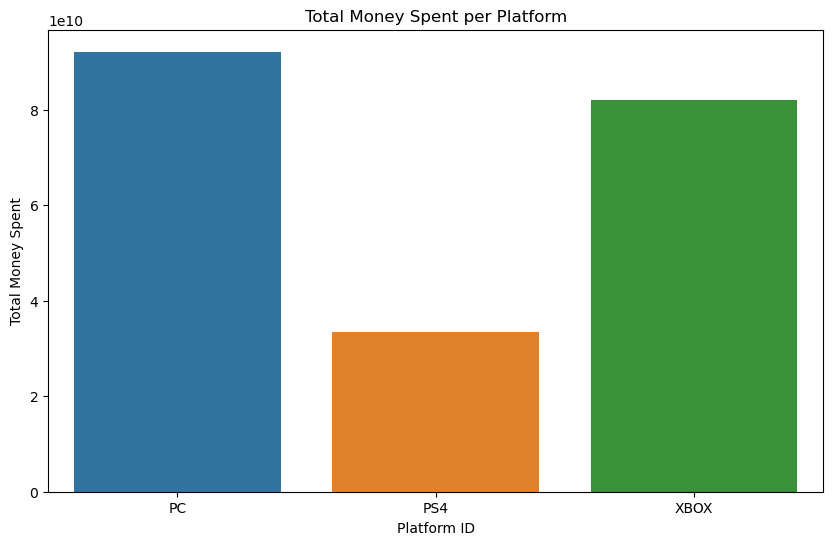

In [7]:
# 1. Total money spent per platform
plt.figure(figsize=(10, 6))
platform_spending = df.groupby('platform_id')['money_spent'].sum().reset_index()
sns.barplot(data=platform_spending, x='platform_id', y='money_spent')
plt.title('Total Money Spent per Platform')
plt.xlabel('Platform ID')
plt.ylabel('Total Money Spent')
plt.show()

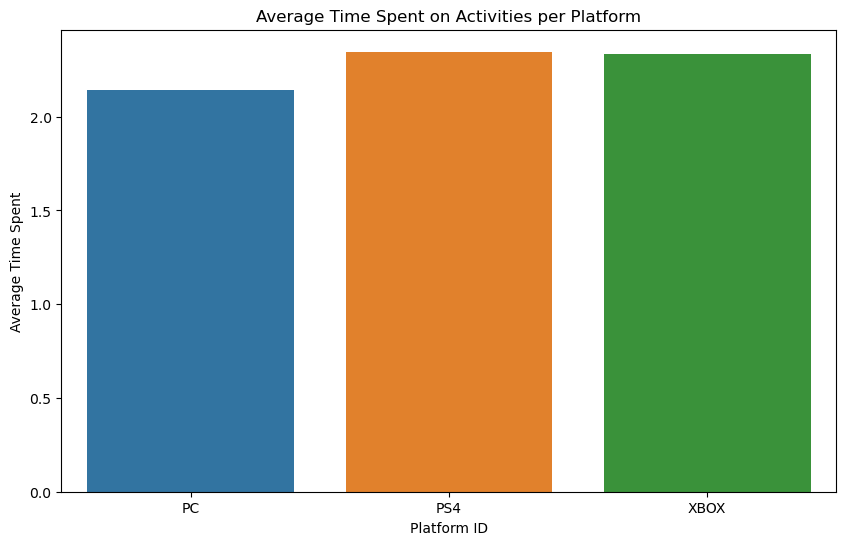

In [8]:
# 2. Average time spent on activities per platform
plt.figure(figsize=(10, 6))
platform_time_spent = df.groupby('platform_id')['time_spent'].mean().reset_index()
sns.barplot(data=platform_time_spent, x='platform_id', y='time_spent')
plt.title('Average Time Spent on Activities per Platform')
plt.xlabel('Platform ID')
plt.ylabel('Average Time Spent')
plt.show()

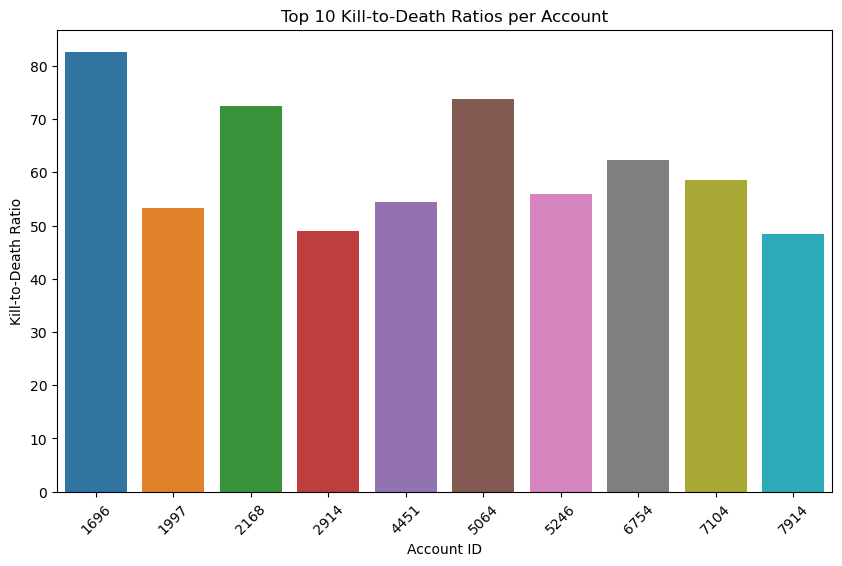

In [9]:
# 3. Kill-to-death ratio per account
df['kill_death_ratio'] = df['kills'] / df['deaths'].replace(0, 1) # Replace 0 deaths with 1 to avoid division by zero
plt.figure(figsize=(10, 6))
kill_death_ratio = df.groupby('account_id')['kill_death_ratio'].mean().reset_index()
kill_death_ratio = kill_death_ratio.sort_values(by='kill_death_ratio', ascending=False).head(10) # Top 10 accounts
sns.barplot(data=kill_death_ratio, x='account_id', y='kill_death_ratio')
plt.title('Top 10 Kill-to-Death Ratios per Account')
plt.xlabel('Account ID')
plt.ylabel('Kill-to-Death Ratio')
plt.xticks(rotation=45)
plt.show()

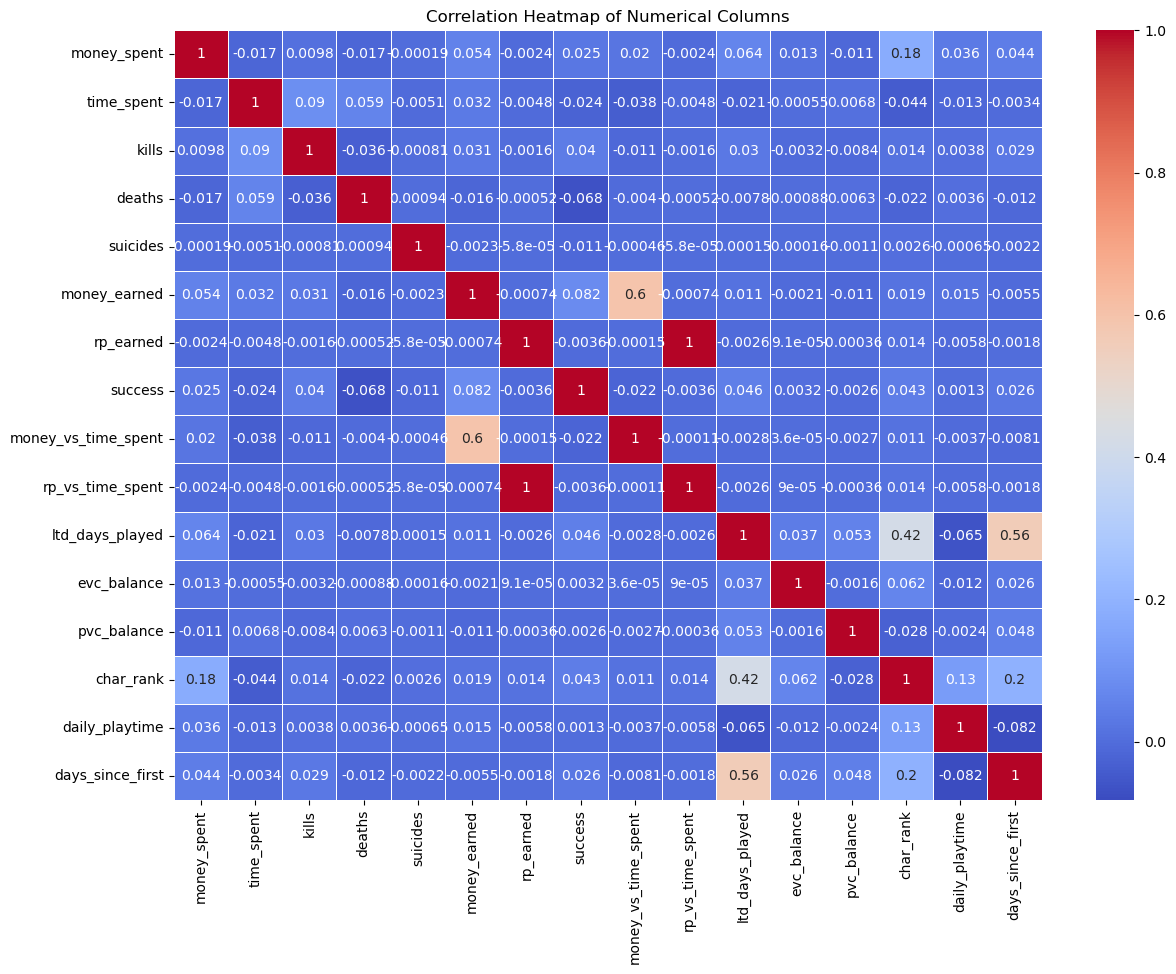

In [10]:
# 4. Correlation heatmap of numerical columns
plt.figure(figsize=(14, 10))
numerical_cols = ['money_spent', 'time_spent', 'kills', 'deaths', 'suicides', 'money_earned', 
                  'rp_earned', 'success', 'money_vs_time_spent', 'rp_vs_time_spent', 
                  'ltd_days_played', 'evc_balance', 'pvc_balance', 'char_rank', 'daily_playtime', 'days_since_first']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

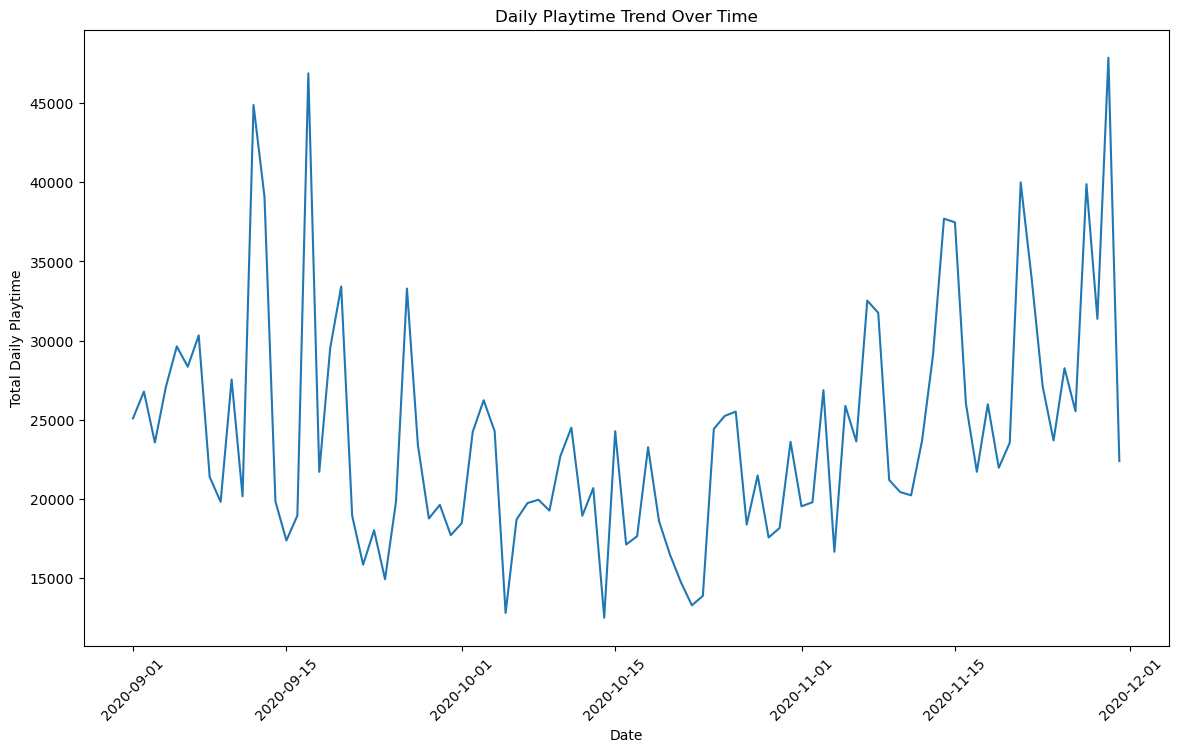

In [11]:
# 5. Daily playtime trend over time
plt.figure(figsize=(14, 8))
daily_playtime_trend = df.groupby('occur_date')['daily_playtime'].sum().reset_index()
daily_playtime_trend['occur_date'] = pd.to_datetime(daily_playtime_trend['occur_date'])
daily_playtime_trend = daily_playtime_trend.sort_values(by='occur_date')
plt.plot(daily_playtime_trend['occur_date'], daily_playtime_trend['daily_playtime'])
plt.title('Daily Playtime Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Daily Playtime')
plt.xticks(rotation=45)
plt.show()

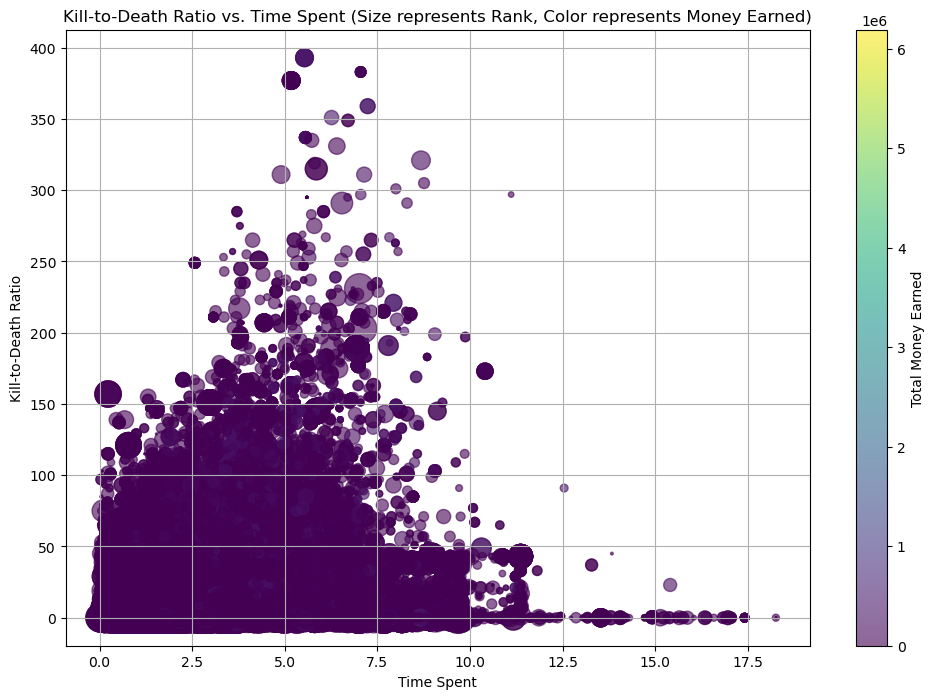

In [12]:
# Plot the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['time_spent'], 
    df['kill_death_ratio'], 
    c=df['money_earned'], 
    s=df['char_rank'], 
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(scatter, label='Total Money Earned')
plt.xlabel('Time Spent')
plt.ylabel('Kill-to-Death Ratio')
plt.title('Kill-to-Death Ratio vs. Time Spent (Size represents Rank, Color represents Money Earned)')
plt.grid(True)
plt.show()

In [15]:
# Calculate correlation
correlation = df[['kill_death_ratio', 'time_spent']].corr().iloc[0, 1]
print(f"Correlation between KD ratio and Time Spent: {correlation:.2f}")

# Calculate average KD ratio and time spent for different ranks
rank_stats = df.groupby('char_rank')[['kill_death_ratio', 'time_spent']].mean().reset_index()
print(rank_stats.head())

# Display top 10 players based on a combination of KD ratio and time spent
df['performance_score'] = df['kill_death_ratio'] * df['time_spent']
top_players = df.nlargest(10, 'performance_score')[['account_id', 'kill_death_ratio', 'time_spent', 'performance_score']]
top_players

Correlation between KD ratio and Time Spent: 0.09
   char_rank  kill_death_ratio  time_spent
0        1.0          5.709402    2.497641
1        2.0          6.091050    2.267850
2        3.0          3.388776    2.351696
3        4.0          4.506106    2.676541
4        5.0          3.431908    2.582120


,account_id,kill_death_ratio,time_spent,performance_score
793615,480,297.0,11.109030,3299.381955
802810,7536,321.0,8.676203,2785.061074
577682,2446,383.0,7.048604,2699.615235
577737,2446,383.0,7.048604,2699.615235
577792,2446,383.0,7.048604,2699.615235
577847,2446,383.0,7.048604,2699.615235
577902,2446,383.0,7.048604,2699.615235
577957,2446,383.0,7.048604,2699.615235
578012,2446,383.0,7.048604,2699.615235
578067,2446,383.0,7.048604,2699.615235


In [17]:
bottom_players = df.nsmallest(10, 'performance_score')[['account_id', 'kill_death_ratio', 'time_spent', 'performance_score']]
bottom_players

,account_id,kill_death_ratio,time_spent,performance_score
1,1295,0.0,0.996677,0.0
2,1295,0.0,1.475342,0.0
3,1295,0.0,1.848230,0.0
4,1295,0.0,1.004437,0.0
5,1295,0.0,6.457997,0.0
7,1295,0.0,2.367032,0.0
9,1295,0.0,0.996677,0.0
10,1295,0.0,1.475342,0.0
11,1295,0.0,1.848230,0.0
12,1295,0.0,1.004437,0.0


In [20]:
# Compute the correlation matrix
correlation_matrix = df[['money_spent', 'kill_death_ratio', 'kills', 'deaths', 'time_spent', 'performance_score']].corr()
correlation_matrix

,money_spent,kill_death_ratio,kills,deaths,time_spent,performance_score
money_spent,1.000000,0.010282,0.009846,-0.017296,-0.017382,0.009270
kill_death_ratio,0.010282,1.000000,0.997821,-0.038305,0.086450,0.864262
kills,0.009846,0.997821,1.000000,-0.035596,0.090016,0.863000
deaths,-0.017296,-0.038305,-0.035596,1.000000,0.059318,-0.024635
time_spent,-0.017382,0.086450,0.090016,0.059318,1.000000,0.215521
performance_score,0.009270,0.864262,0.863000,-0.024635,0.215521,1.000000


Text(0.5, 1.0, 'KD Ratio vs Money Spent')

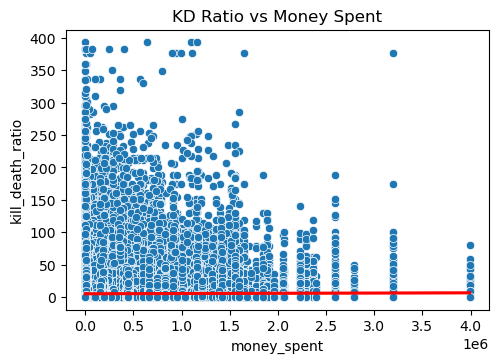

In [21]:
# Visualization: Scatter plots and regression lines
plt.figure(figsize=(12, 8))

# KD Ratio vs Money Spent
plt.subplot(2, 2, 1)
sns.scatterplot(x='money_spent', y='kill_death_ratio', data=df)
sns.regplot(x='money_spent', y='kill_death_ratio', data=df, scatter=False, color='red')
plt.title('KD Ratio vs Money Spent')

Text(0.5, 1.0, 'Performance Score vs Money Spent')

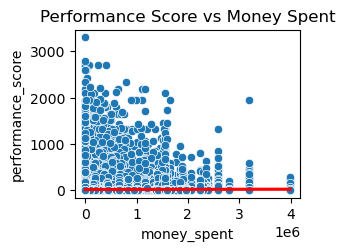

In [22]:
# Performance Score vs Money Spent
plt.subplot(2, 2, 2)
sns.scatterplot(x='money_spent', y='performance_score', data=df)
sns.regplot(x='money_spent', y='performance_score', data=df, scatter=False, color='red')
plt.title('Performance Score vs Money Spent')

Text(0.5, 1.0, 'Kills vs Money Spent')

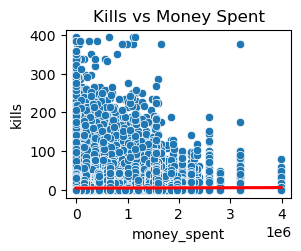

In [23]:
# Kills vs Money Spent
plt.subplot(2, 2, 3)
sns.scatterplot(x='money_spent', y='kills', data=df)
sns.regplot(x='money_spent', y='kills', data=df, scatter=False, color='red')
plt.title('Kills vs Money Spent')

Text(0.5, 1.0, 'Time Spent vs Money Spent')

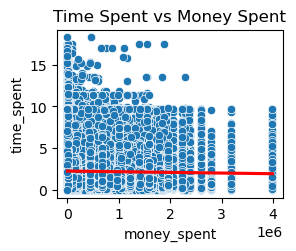

In [24]:
# Time Spent vs Money Spent
plt.subplot(2, 2, 4)
sns.scatterplot(x='money_spent', y='time_spent', data=df)
sns.regplot(x='money_spent', y='time_spent', data=df, scatter=False, color='red')
plt.title('Time Spent vs Money Spent')

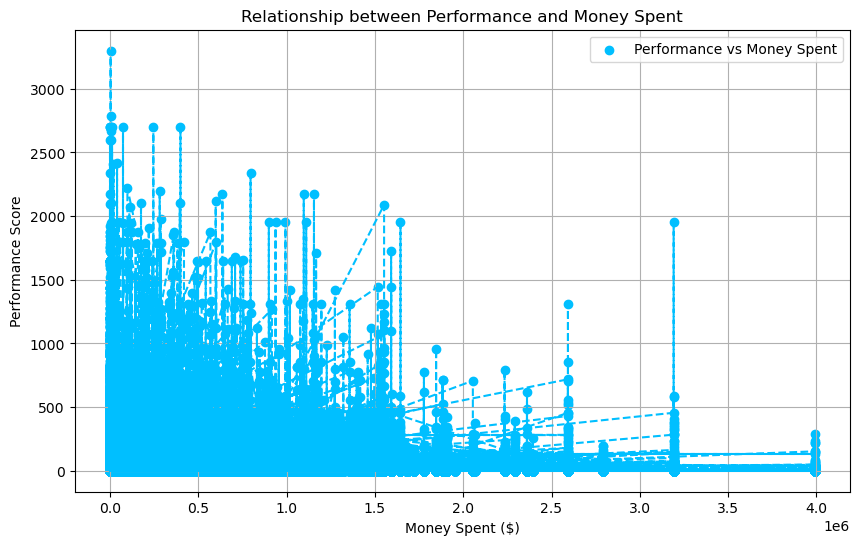

In [26]:
# Extract data from DataFrame
money_spent = df['money_spent']
performance = df['performance_score']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(money_spent, performance, color='deepskyblue', label='Performance vs Money Spent')
plt.plot(money_spent, performance, color='deepskyblue', linestyle='--')  # Optional line connecting the points

# Add labels and title
plt.xlabel('Money Spent ($)')
plt.ylabel('Performance Score')
plt.title('Relationship between Performance and Money Spent')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

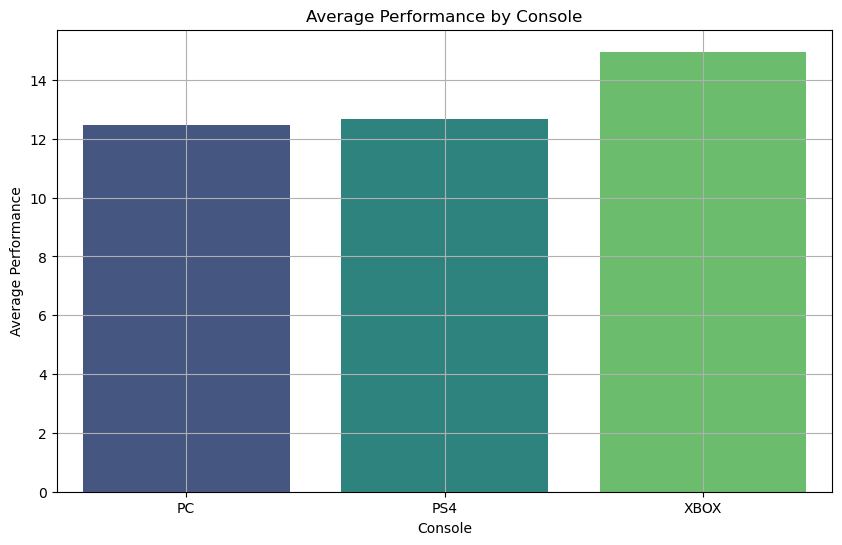

In [32]:
# Calculate average performance by console
average_performance_by_console = df.groupby('platform_id')['performance_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='platform_id', y='performance_score', data=average_performance_by_console, palette='viridis')
plt.xlabel('Console')
plt.ylabel('Average Performance')
plt.title('Average Performance by Console')
plt.grid(True)
plt.show()

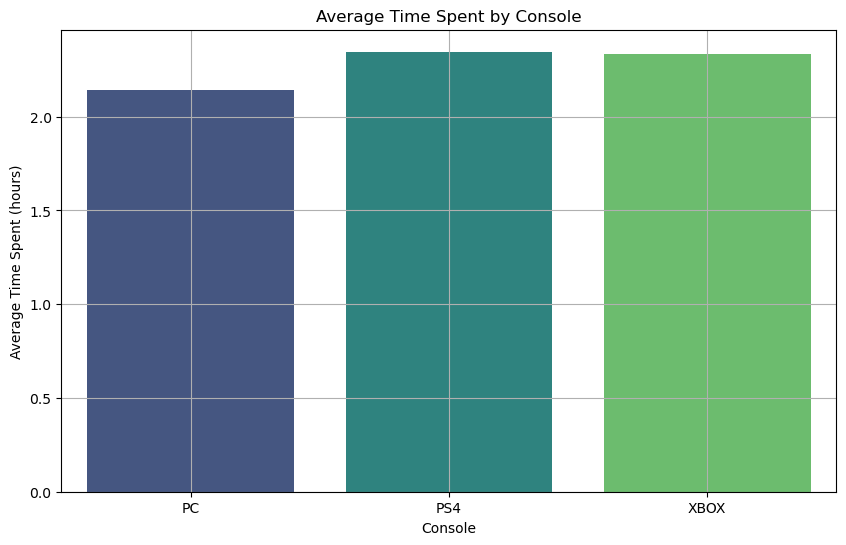

In [33]:
# Calculate average time spent by console
average_time_spent_by_console = df.groupby('platform_id')['time_spent'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='platform_id', y='time_spent', data=average_time_spent_by_console, palette='viridis')
plt.xlabel('Console')
plt.ylabel('Average Time Spent (hours)')
plt.title('Average Time Spent by Console')
plt.grid(True)
plt.show()

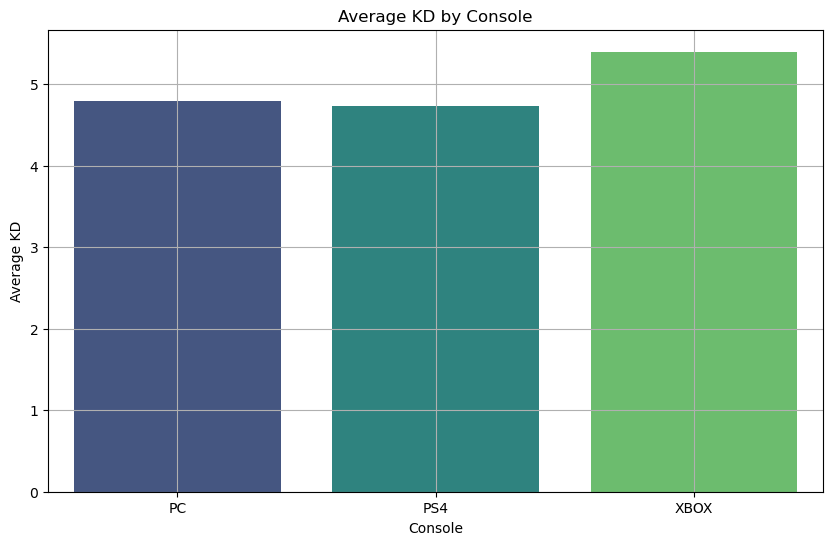

In [35]:
average_performance_by_console = df.groupby('platform_id')['kill_death_ratio'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='platform_id', y='kill_death_ratio', data=average_performance_by_console, palette='viridis')
plt.xlabel('Console')
plt.ylabel('Average KD')
plt.title('Average KD by Console')
plt.grid(True)
plt.show()

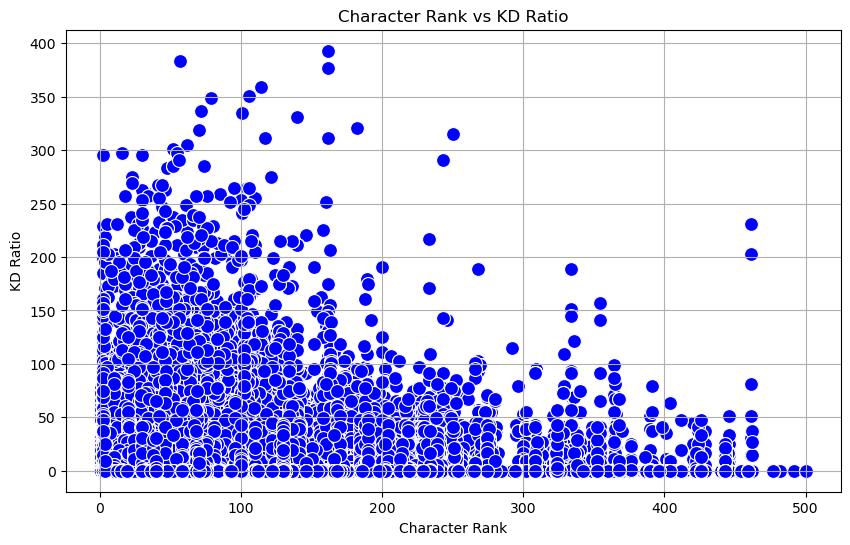

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='char_rank', y='kill_death_ratio', data=df, color='blue', s=100)
plt.xlabel('Character Rank')
plt.ylabel('KD Ratio')
plt.title('Character Rank vs KD Ratio')
plt.grid(True)
plt.show()